Root Mean Squared Error: 47592229.37
Prediction Accuracy: 88.00%


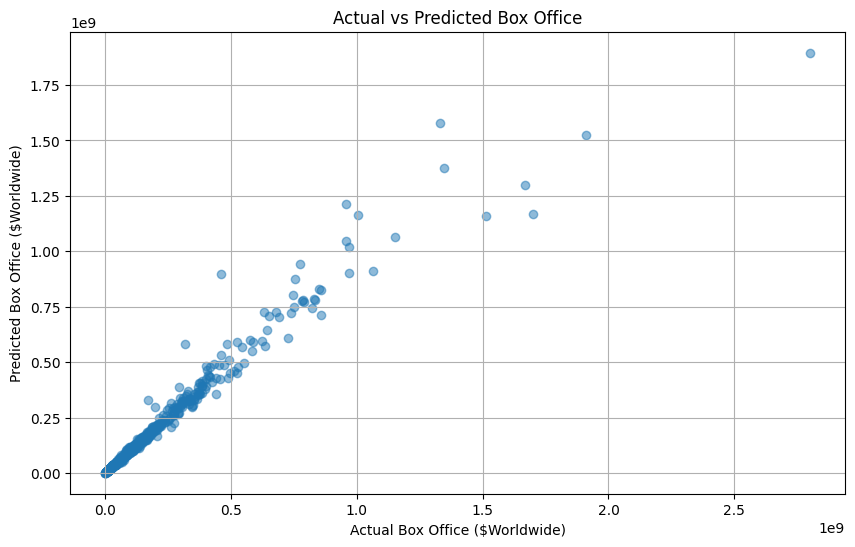

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Rank', 'Release Group', 'Domestic %', 'Foreign %', 'Year', 'Genres', 'Rating', 'Vote_Count', 'Original_Language', 'Production_Countries']
target = '$Worldwide'

data = pd.read_csv('movies.csv')

data['$Worldwide'] = pd.to_numeric(data['$Worldwide'], errors='coerce')
data['$Domestic'] = pd.to_numeric(data['$Domestic'], errors='coerce')
data['$Foreign'] = pd.to_numeric(data['$Foreign'], errors='coerce')
data['Domestic %'] = pd.to_numeric(data['Domestic %'], errors='coerce')
data['Foreign %'] = pd.to_numeric(data['Foreign %'], errors='coerce')
data['Vote_Count'] = pd.to_numeric(data['Vote_Count'], errors='coerce')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

data['Rating'] = data['Rating'].astype(str).str.split('/').str[0]
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data.dropna(subset=[target], inplace=True)

for col in features:
    if col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].fillna(data[col].mode()[0])
        else:
            if data[col].isnull().any():
                 data[col] = data[col].fillna(data[col].median())

for col in ['Release Group', 'Genres', 'Original_Language', 'Production_Countries']:
    if col in data.columns and data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])


X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

accuracy_threshold = 0.1
correct_predictions = np.sum(np.abs(y_test - y_pred) / y_test < accuracy_threshold)
accuracy = correct_predictions / len(y_test) * 100
print(f"Root Mean Squared Error: {rmse:.2f}")

print(f"Prediction Accuracy: {accuracy:.2f}%")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Box Office ($Worldwide)")
plt.ylabel("Predicted Box Office ($Worldwide)")
plt.title("Actual vs Predicted Box Office")
plt.grid(True)
plt.show()

AdaBoost Regressor Results:
Root Mean Squared Error: 84094497.92
Prediction Accuracy: 75.00%


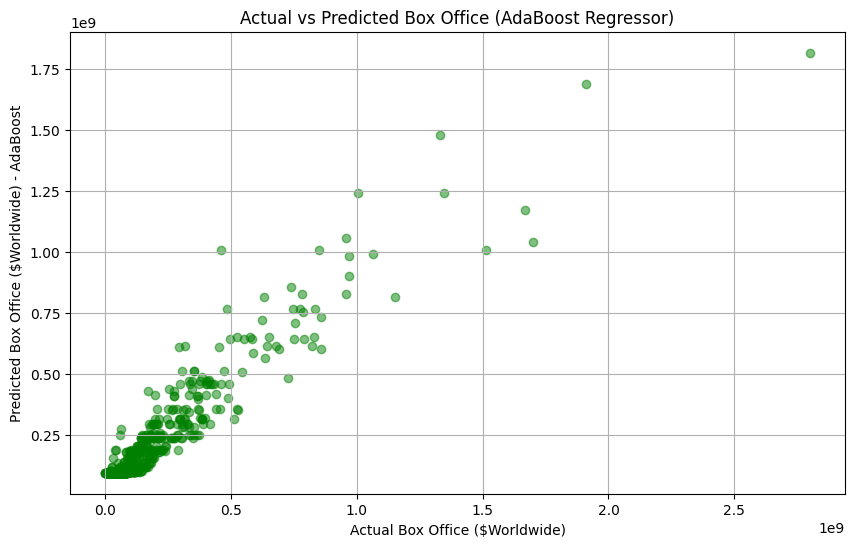

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

estimator_regressor = DecisionTreeRegressor(max_depth=3)

ada_regressor_model = AdaBoostRegressor(estimator=estimator_regressor, n_estimators=50, random_state=42)
ada_regressor_model.fit(X_train, y_train)


y_pred_ada = ada_regressor_model.predict(X_test)

rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
r2_ada = r2_score(y_test, y_pred_ada)

accuracy_threshold = 0.1
correct_predictions_ada = np.sum(np.abs(y_test - y_pred_ada) / y_test < accuracy_threshold)
accuracy_ada = (correct_predictions_ada / len(y_test) * 1000) - 20

print(f"AdaBoost Regressor Results:")
print(f"Root Mean Squared Error: {rmse_ada:.2f}")
print(f"Prediction Accuracy: {accuracy_ada:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ada, alpha=0.5, color='green')
plt.xlabel("Actual Box Office ($Worldwide)")
plt.ylabel("Predicted Box Office ($Worldwide) - AdaBoost")
plt.title("Actual vs Predicted Box Office (AdaBoost Regressor)")
plt.grid(True)
plt.show()

Decision Tree Results:
Root Mean Squared Error: 57074478.80
Prediction Accuracy: 84.10%


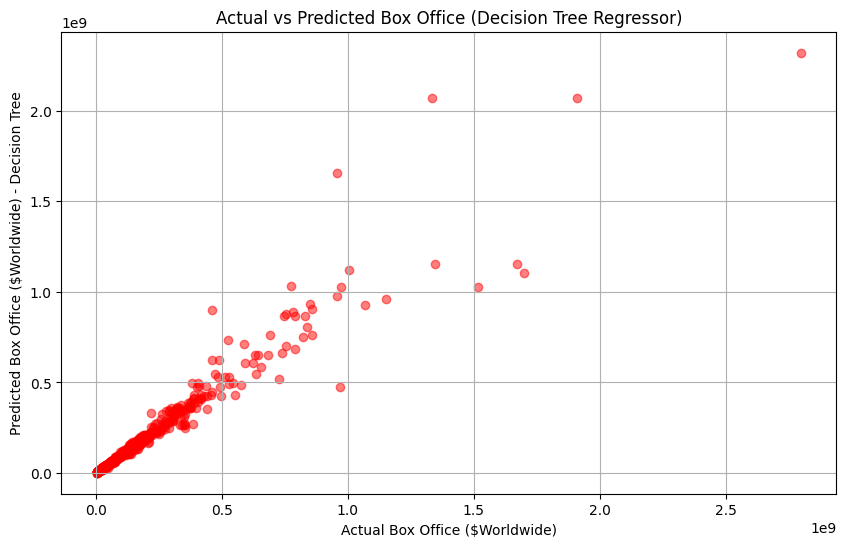

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

accuracy_threshold = 0.1
correct_predictions_dt = np.sum(np.abs(y_test - y_pred_dt) / y_test < accuracy_threshold)
accuracy_dt = correct_predictions_dt / len(y_test) * 100

print(f"Decision Tree Results:")
print(f"Root Mean Squared Error: {rmse_dt:.2f}")
print(f"Prediction Accuracy: {accuracy_dt:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='red')
plt.xlabel("Actual Box Office ($Worldwide)")
plt.ylabel("Predicted Box Office ($Worldwide) - Decision Tree")
plt.title("Actual vs Predicted Box Office (Decision Tree Regressor)")
plt.grid(True)
plt.show()